In [20]:
import os
import ee
import datetime
import time
import sklearn
import importlib

import geopandas as gp
import pandas as pd
import numpy as np
import rsfuncs as rs
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from pandas.tseries.offsets import MonthEnd
from dateutil.relativedelta import relativedelta
from sklearn import preprocessing

from tqdm import tqdm_notebook as tqdm

ee.Initialize()

# Load shapefile 
shp = gp.read_file('../shape/study_area/c2vsim_sub_18.shp')

# Make EE objects from shapefiles 
area = rs.gdf_to_ee_poly(shp)

# Load Small watersheds shapefile, dissolve, and simplify it slightly 
sw_shp = gp.read_file('../shape/study_area/small_sheds.shp').dissolve().explode()
sw_area = rs.gdf_to_ee_poly(sw_shp)

ro_gdf = gp.GeoDataFrame(pd.concat([shp, sw_shp])).dissolve().explode()
ro_area = rs.gdf_to_ee_poly(ro_gdf)

# Load RS data dict from rsfuncs.py
data = rs.load_data()

# ECMWF
data['ecmwf_r'] = [ee.ImageCollection("ECMWF/ERA5_LAND/MONTHLY") , 'runoff', 1e5, 11132] # mm --> km 


# Set start/end
strstart = '2001-09-01'
strend = '2021-09-30'

startdate = datetime.datetime.strptime(strstart, "%Y-%m-%d")
enddate = datetime.datetime.strptime(strend, "%Y-%m-%d")

print("-------" * 10)
print("Processing Runoff Data")
print("-------" * 10)

# R
# tc_r = rs.calc_monthly_sum(data['tc_r'], startdate, enddate, ro_area)
# ecmwf_r = rs.calc_monthly_sum(data['ecmwf_r'], startdate, enddate, ro_area)

----------------------------------------------------------------------
Processing Runoff Data
----------------------------------------------------------------------


In [ ]:
outdir = "../data/wb_variables"

if not os.path.exists(outdir):
    os.mkdir(outdir)

    

In [22]:
print("-------" * 10)
print("Processing Runoff Data")
print("-------" * 10)

# R
tc_r = rs.calc_monthly_sum(data['tc_r'], startdate, enddate, ro_area)
tc_r.columns = ['tc_r']

ecmwf_r = rs.calc_monthly_sum(data['ecmwf_r'], startdate, enddate, ro_area)
ecmwf_r.columns = ['ecmwf_r']

fldas_ssr = rs.calc_monthly_sum(data['fldas_ssr'], startdate, enddate, ro_area)
fldas_bfr = rs.calc_monthly_sum(data['fldas_bfr'], startdate, enddate, ro_area)
fldas_r = pd.DataFrame(pd.concat([fldas_bfr, fldas_ssr], axis = 1).sum(axis =1))
fldas_r.columns = ['fldas_r']

gldas_ssr = rs.calc_monthly_sum(data['gldas_ssr'], startdate, enddate, ro_area)
gldas_bfr = rs.calc_monthly_sum(data['gldas_bfr'], startdate, enddate, ro_area)
gldas_r = pd.DataFrame(pd.concat([gldas_bfr, gldas_ssr], axis = 1).sum(axis =1))
gldas_r.columns = ['gldas_r']


rdfs = {"r_tc": tc_r, "r_gldas": gldas_r, "r_fldas": fldas_r, "r_ecmwf": ecmwf_r}

----------------------------------------------------------------------
Processing Runoff Data
----------------------------------------------------------------------
processing:


  0%|          | 0/21 [00:00<?, ?it/s]

IDAHO_EPSCOR/TERRACLIMATE/195801


  0%|          | 0/21 [00:00<?, ?it/s]

processing:
ECMWF/ERA5_LAND/MONTHLY/198101


  0%|          | 0/21 [00:00<?, ?it/s]

processing:
NASA/FLDAS/NOAH01/C/GL/M/V001/198201


100%|██████████| 21/21 [00:08<00:00,  2.37it/s]


processing:


  5%|▍         | 1/21 [00:00<00:02,  7.87it/s]

NASA/FLDAS/NOAH01/C/GL/M/V001/198201


  0%|          | 0/21 [00:00<?, ?it/s]

processing:
NASA/GLDAS/V021/NOAH/G025/T3H/A20000101_0300


100%|██████████| 21/21 [00:04<00:00,  4.71it/s]


processing:


  0%|          | 0/21 [00:00<?, ?it/s]

NASA/GLDAS/V021/NOAH/G025/T3H/A20000101_0300


100%|██████████| 21/21 [00:05<00:00,  3.64it/s]


In [29]:

r_outfn = os.path.join(outdir,"runoff.csv")
r_df_out = pd.concat(list(rdfs.values()), axis = 1)
r_df_out.to_csv(r_outfn)


<AxesSubplot:>

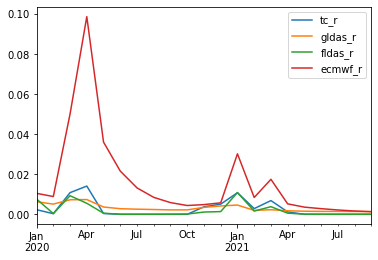

In [32]:
r_df_out.plot()

In [ ]:
gl_bfr = rs.calc_monthly_sum(data['gldas_bfr'], startdate, enddate, ro_area)
gl_ssr = rs.calc_monthly_sum(data['gldas_ssr'], startdate, enddate, ro_area)


  0%|          | 0/249 [00:00<?, ?it/s]

processing:
NASA/GLDAS/V021/NOAH/G025/T3H/A20000101_0300


  0%|          | 0/249 [00:00<?, ?it/s]

processing:
NASA/GLDAS/V021/NOAH/G025/T3H/A20000101_0300


 60%|██████    | 150/249 [00:33<00:20,  4.81it/s]

In [ ]:
gl_bfr.plot()
gl_ssr.plot()